In [65]:
# %pip install --user annoy
# %pip install sentence-transformers
# %pip install torch torchvision torchaudio
#%pip install markov_clustering

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Python39\python.exe -m pip install --upgrade pip' command.


In [1]:
from annoy import AnnoyIndex
from create_index import create_index
import torch
from sentence_transformers import SentenceTransformer,util
from intellidiff import IntelliDiff
import re
import numpy as np
from vectorize import load_json, save_json,vectorize
from pullDescriptions import getDesc
import scipy.cluster.hierarchy as hc
from sklearn.cluster import DBSCAN,KMeans
from sklearn.manifold import MDS,TSNE,Isomap
from matplotlib import pyplot as plt
from unionFind import UnionFind
import nltk
from cluster_comparison import compare
from matplotlib.lines import Line2D
from scipy.spatial.distance import cdist
%cd ./NCDBasedChecker
from NCDBasedChecker import utils
from NCDClusterer import NCDClusterer,Clusterer
%cd ..

C:\Python39\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


c:\Users\vikram14\Desktop\Research\IntelliDiff\NCDBasedChecker
c:\Users\vikram14\Desktop\Research\IntelliDiff


# ASSIGNMENT 1- LINKED LIST

In [3]:
method_names_A1=['insert', 'remove', 'get', 'insort', 'size', 'isEmpty','clear']
path='./comp410/A1/'

In [10]:
# methods_410_A1= load_json('./comp410/A1/LinkedList')
# for name in method_names_A1:
#     save_json(list(filter(lambda x : x['name']== 'size', methods_410_A1)),'./comp410/A1/size')

#### IS EMPTY

In [135]:
methods = load_json(path+'/isEmpty')
print(f"Num methods = {len(methods)}")
for i,m in enumerate(methods):
    m['studentID']=f"Name{i}"

Num methods = 239


In [136]:
sub_arr= utils.methodArray_to_SubmissionArray(methods, [(f"Name{i}",i)for i in range(len(methods))],'tok')
clusterer = NCDClusterer(None, sub_arr)
res=clusterer.checkShuffleSimilarity(b=256, s=128,adaptive_windows=True) # Block vs regular-> regular tends to do better.
norm_res =(res - np.min(res))/(np.max(res)-np.min(res))

Pre-processing done!
calculating row: 0

calculating row: 1

calculating row: 2

calculating row: 3

calculating row: 4

calculating row: 5

calculating row: 6

calculating row: 7

calculating row: 8

calculating row: 9

calculating row: 10

calculating row: 11

calculating row: 12

calculating row: 13

calculating row: 14

calculating row: 15

calculating row: 16

calculating row: 17

calculating row: 18

calculating row: 19

calculating row: 20

calculating row: 21

calculating row: 22

calculating row: 23

calculating row: 24

calculating row: 25

calculating row: 26

calculating row: 27

calculating row: 28

calculating row: 29

calculating row: 30

calculating row: 31

calculating row: 32

calculating row: 33

calculating row: 34

calculating row: 35

calculating row: 36

calculating row: 37

calculating row: 38

calculating row: 39

calculating row: 40

calculating row: 41

calculating row: 42

calculating row: 43

calculating row: 44

calculating row: 45

calculating row: 46

ca

In [48]:
unionFind=UnionFind([m['studentID']for m in methods])
for i in range(len(methods)):
    for j in range(i+1,len(methods)):
        if(norm_res[i,j]<=0.225):
            unionFind.union(methods[i]['studentID'], methods[j]['studentID'])
             
unique_solns = {}
for solution in methods:
    key = unionFind.find(solution['studentID']) 
    if key not in unique_solns:
        unique_solns[key] = []
    unique_solns[key].append(solution)
unique_solns_summary=[(k,len(v)) for k,v in unique_solns.items()]
unique_solns_summary=sorted(unique_solns_summary,reverse=True,key=lambda x: x[1])

<BarContainer object of 15 artists>

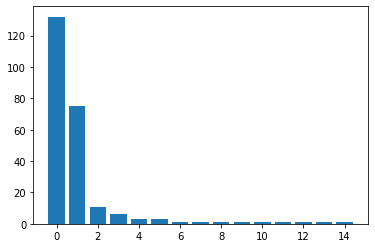

In [49]:
plt.bar(range(0,len(unique_solns_summary)),[x[1] for x in unique_solns_summary])

In [22]:
i=0
for k,v in unique_solns.items():
    print(f"******GROUP {i+1}*********")
    print(f"      ***SIZE: {len(unique_solns[k])}****")
    for solution in unique_solns[k]:
        print(solution['studentID'])
        print(solution['code'])
        print("")
    print("")

******GROUP 1*********
      ***SIZE: 70****
Name0
@Override
public boolean isEmpty() {
    return size == 0;
}

Name4
@Override
public boolean isEmpty() {
    return headCell == null;
}

Name5
@Override
public boolean isEmpty() {
    //Or size == 0
    return headCell == null;
}

Name11
@Override
public boolean isEmpty() {
    return (size() == 0);
}

Name12
@Override
public boolean isEmpty() {
    return size == 0;
}

Name16
@Override
public boolean isEmpty() {
    // TODO Auto-generated method stub
    return this.numElts == 0;
}

Name17
@Override
public boolean isEmpty() {
    return size == 0;
}

Name18
@Override
public boolean isEmpty() {
    return size == 0;
}

Name21
@Override
public boolean isEmpty() {
    return (size() == 0);
}

Name27
@Override
public boolean isEmpty() {
    return (size() == 0);
}

Name29
@Override
public boolean isEmpty() {
    return this.size() == 0;
}

Name32
@Override
public boolean isEmpty() {
    return this.size() == 0;
}

Name40
@Override
public 

In [55]:
empty_labels= {
    # one liner 
    '1':[0,   3,   4,   5,  11,  12,  16,  17,  18,  21,  27,  29,  32,
         39,  40,  41,  45,  47,  49,  50,  52,  54,  57,  58,  67,  68,
         70,  73,  74,  77,  78,  79,  83,  84,  93,  94,  96, 100, 101,
        105, 107, 111, 113, 121, 122, 123, 125, 126, 127, 131, 132, 133,
        136, 137, 139, 140, 144, 145, 148, 151, 153, 157, 159, 162, 166,
        167, 169, 171, 173, 182, 184, 189, 194, 196, 197, 201, 202, 203,
        204, 206, 210, 212, 213, 214, 216, 219, 220, 222, 223, 224, 226,
        227, 228, 229, 231, 238, 25, 147,134],
    # if else
    '2':[1,   2,   6,   7,   8,   9,  10,  13,  14,  15,  19,  20,  22,
         23,  24,  26,  28,  30,  31,  33,  34,  35,  36,  37,  38,
         42,  43,  44,  46,  48,  51,  53,  55,  56,  59,  60,  61,  62,
         63,  64,  65,  66,  69,  71,  72,  75,  76,  80,  81,  82,  85,
         86,  87,  88,  89,  90,  91,  92,  95,  97,  98,  99, 102, 103,
        104, 106, 108, 109, 110, 112, 114, 115, 116, 117, 118, 119, 120,
        124, 128, 129, 130, 135, 138, 141, 142, 143, 146, 149,
        150, 152, 154, 155, 156, 158, 160, 161, 163, 164, 165, 168, 170,
        172, 174, 175, 176, 177, 178, 179, 180, 181, 183, 185, 186, 187,
        188, 190, 191, 192, 193, 195, 198, 199, 200, 205, 207, 208, 209,
        211, 215, 217, 218, 221, 225, 230, 232, 233, 234, 235, 236, 237]

}
for i,m in enumerate(methods):
    for k,v in empty_labels.items():
        if(i in v):
            m['label']=k
            break
#save_json(methods,path+'/isEmpty.json')
for i in ['1','2']:
    print(len(empty_labels[i]))

99
140


In [107]:
np.where(labels_med==0)

(array([  0,   3,   4,   5,  11,  12,  16,  17,  18,  21,  27,  29,  32,
         39,  40,  41,  45,  47,  49,  50,  52,  54,  57,  58,  67,  68,
         70,  73,  74,  77,  78,  79,  83,  84,  93,  94,  96, 100, 101,
        105, 107, 111, 113, 121, 122, 123, 125, 126, 127, 131, 132, 133,
        136, 137, 139, 140, 144, 145, 148, 151, 153, 157, 159, 162, 166,
        167, 169, 171, 173, 182, 184, 189, 194, 196, 197, 201, 202, 203,
        204, 206, 210, 212, 213, 214, 216, 219, 220, 222, 223, 224, 226,
        227, 228, 229, 231, 238], dtype=int64),)

In [137]:
mds_vectors_2dim = MDS(n_components=2,dissimilarity='precomputed').fit_transform(norm_res)
kmeans = KMeans(n_clusters=2,max_iter=10000)
kmeans.fit(mds_vectors_2dim)
labels_med = kmeans.labels_

In [51]:
clusters={i:[] for i in labels_med} #if i>0}
sims={i:[] for i in labels_med}
for i,m in enumerate(methods):
    # if(labels[i]<=0):
    #     continue
    clusters[labels_med[i]].append((m['code'],m['studentID']))
    sims[labels_med[i]].append(i)



for k,v in clusters.items():
    print(f"GROUP : {k} SIZE : {len(v)}")
    print()    
    for m in v:
        print(f'{m[1]}')
        print(m[0])
        print("\n ######")
    print("\n***********************************************")

GROUP : 1 SIZE : 96

Name0
@Override
public boolean isEmpty() {
    return size == 0;
}

 ######
Name3
public boolean isEmpty() {
    return size() == 0;
}

 ######
Name4
@Override
public boolean isEmpty() {
    return headCell == null;
}

 ######
Name5
@Override
public boolean isEmpty() {
    //Or size == 0
    return headCell == null;
}

 ######
Name11
@Override
public boolean isEmpty() {
    return (size() == 0);
}

 ######
Name12
@Override
public boolean isEmpty() {
    return size == 0;
}

 ######
Name16
@Override
public boolean isEmpty() {
    // TODO Auto-generated method stub
    return this.numElts == 0;
}

 ######
Name17
@Override
public boolean isEmpty() {
    return size == 0;
}

 ######
Name18
@Override
public boolean isEmpty() {
    return size == 0;
}

 ######
Name21
@Override
public boolean isEmpty() {
    return (size() == 0);
}

 ######
Name27
@Override
public boolean isEmpty() {
    return (size() == 0);
}

 ######
Name29
@Override
public boolean isEmpty() {
    retu

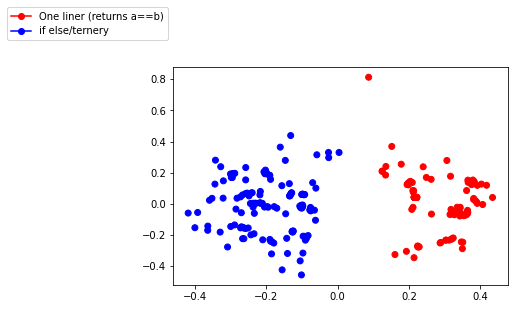

In [138]:
from matplotlib.lines import Line2D
fig, ax = plt.subplots()
manual_rare_label=[s['label'] for s in methods]
cmap={'1':'red','2':'blue', '3':'green','4':'yellow'}
ax.scatter(mds_vectors_2dim[:,0],mds_vectors_2dim[:,1], c=[cmap[i] for i in manual_rare_label])
custom_legend=(Line2D([0],[0], marker ='o',color='red'),Line2D([0],[0], marker ='o',color='blue'))
ax.legend(custom_legend,["One liner (returns a==b)","if else/ternery"],bbox_to_anchor =(0,1.3))
# for i in range(mds_vectors_2dim.shape[0]):
#     if(manual_rare_label[i]=='2'):
#         ax.annotate(methods[i]['studentID'], (mds_vectors_2dim[i,0],mds_vectors_2dim[i,1]))

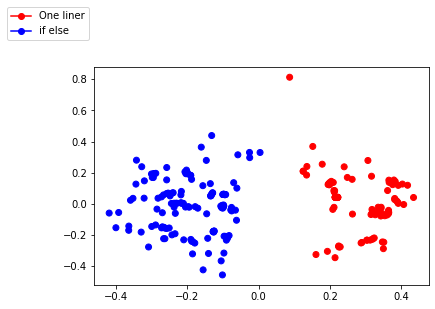

In [139]:
from matplotlib.lines import Line2D
fig, ax = plt.subplots()
empty_label=[s['label'] for s in load_json(path+'isEmpty_NCD_4Groups.json')]
cmap1={'0':'red','1':'blue', '2':'green','3':'yellow'}
ax.scatter(mds_vectors_2dim[:,0],mds_vectors_2dim[:,1], c=[cmap1[i] for i in empty_label])
custom_legend=(Line2D([0],[0], marker ='o',color='red'),Line2D([0],[0], marker ='o',color='blue'))
ax.legend(custom_legend,["One liner","if else"],bbox_to_anchor =(0,1.3))
# for i in range(mds_vectors_2dim.shape[0]):
#     if(empty_label[i]=='1'):
#         ax.annotate(methods[i]['studentID'], (mds_vectors_2dim[i,0],mds_vectors_2dim[i,1]))

In [109]:
for i,m in enumerate(methods):
    m['label']=str(labels_med[i])
save_json(methods,path+'isEmpty_NCD_4Groups.json')

*********************************

iou:{('0', '1'): 1.0, ('1', '2'): 1.0}


accuracy:{('0', '1'): 1.0, ('1', '2'): 1.0}

rand score: 1.0
adjusted rand score: 1.0
normalized mutual information: 1.0
fowlkes mallows score: 1.0
confusion matrix:
    (0,0) - True Negatives. Pair is not clustered together in the predicted and manual clustering.
    (0,1) - False Positives. Pair is clustered together in prediction but not manual clustering.
    (1,0) - False Negatives. Pair is not clustered together in prediction but is clustered together in manual clustering.
    (1,1) - True Positives.  Pair is clustered together in the predicted and manual clustering.



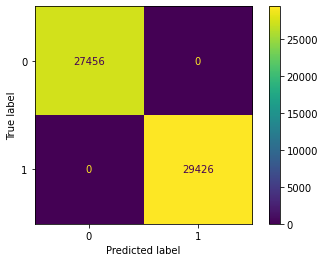

In [5]:
compare(path+'isEmpty_NCD_4GroupsDict.json',path+'/isEmptyDict.json','label').plot()

### SIZE

In [57]:
methods = load_json(path+'/size')
print(f"Num methods = {len(methods)}")
for i,m in enumerate(methods):
    m['studentID']=f"Name{i}"

Num methods = 239


In [141]:
sub_arr= utils.methodArray_to_SubmissionArray(methods, [(f"Name{i}",i)for i in range(len(methods))],'tok')
clusterer = NCDClusterer(None, sub_arr)
res=clusterer.checkShuffleSimilarity(b=512, s=64,adaptive_windows=True) # Block vs regular-> regular tends to do better.
norm_res =(res - np.min(res))/(np.max(res)-np.min(res))

Pre-processing done!
calculating row: 0

calculating row: 1

calculating row: 2

calculating row: 3

calculating row: 4

calculating row: 5

calculating row: 6

calculating row: 7

calculating row: 8

calculating row: 9

calculating row: 10

calculating row: 11

calculating row: 12

calculating row: 13

calculating row: 14

calculating row: 15

calculating row: 16

calculating row: 17

calculating row: 18

calculating row: 19

calculating row: 20

calculating row: 21

calculating row: 22

calculating row: 23

calculating row: 24

calculating row: 25

calculating row: 26

calculating row: 27

calculating row: 28

calculating row: 29

calculating row: 30

calculating row: 31

calculating row: 32

calculating row: 33

calculating row: 34

calculating row: 35

calculating row: 36

calculating row: 37

calculating row: 38

calculating row: 39

calculating row: 40

calculating row: 41

calculating row: 42

calculating row: 43

calculating row: 44

calculating row: 45

calculating row: 46

ca

In [82]:
unionFind=UnionFind([m['studentID']for m in methods])
for i in range(len(methods)):
    for j in range(i+1,len(methods)):
        if(norm_res[i,j]<=0.225):
            unionFind.union(methods[i]['studentID'], methods[j]['studentID'])
             
unique_solns = {}
for solution in methods:
    key = unionFind.find(solution['studentID']) 
    if key not in unique_solns:
        unique_solns[key] = []
    unique_solns[key].append(solution)
unique_solns_summary=[(k,len(v)) for k,v in unique_solns.items()]
unique_solns_summary=sorted(unique_solns_summary,reverse=True,key=lambda x: x[1])

<BarContainer object of 18 artists>

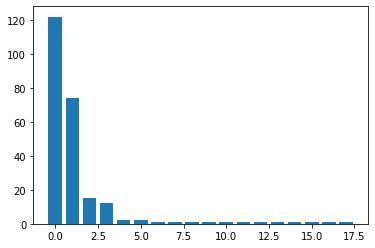

In [83]:
plt.bar(range(0,len(unique_solns_summary)),[x[1] for x in unique_solns_summary])

In [84]:
i=0
for k,v in unique_solns.items():
    print(f"******GROUP {i+1}*********")
    print(f"      ***SIZE: {len(unique_solns[k])}****")
    for solution in unique_solns[k]:
        print(solution['studentID'])
        print(solution['code'])
        print("")
    print("")

******GROUP 1*********
      ***SIZE: 122****
Name0
@Override
public int size() {
    return size;
}

Name1
@Override
public int size() {
    return size;
}

Name2
@Override
public int size() {
    // TODO Auto-generated method stub
    return size;
}

Name5
@Override
public int size() {
    /*
		int size = 0;
		Node temp = headCell;
		while(temp != null) { //or headCell != lastCell
			size++;
			temp = temp.next;
		}
		*/
    return size;
}

Name7
public int size() {
    // TODO Auto-generated method stub
    return size;
}

Name9
/**
   * Finds the current size of the list
   * @return Returns the size of the list
   */
public int size() {
    return size;
}

Name12
@Override
public int size() {
    return size;
}

Name13
@Override
public int size() {
    // TODO Auto-generated method stub
    return numElts;
}

Name15
public int size() {
    return size;
}

Name18
@Override
public int size() {
    return size;
}

Name19
@Override
public int size() {
    return size;
// just have to 

In [4]:
size_labels= {
    # no loop, maintain size variable
    '1':[0,   1,   2,   5,   7,   9,  12,  13,  15,  16,  17,  18,  19,
         23,  24,  25,  27,  30,  32,  34,  37,  39,  41,  45,  46,  47,
         48,  49,  50,  56,  58,  61,  63,  64,  66,  67,  68,  69,  70,
         72,  74,  78,  79,  80,  81,  83,  84,  86,  88,  89,  90,  93,
         94,  95,  96,  97, 100, 101, 103, 107, 108, 110, 111, 112, 113,
        114, 115, 117, 118, 122, 124, 125, 126, 127, 128, 130, 131, 132,
        134, 139, 140, 141, 142, 146, 147, 148, 149, 150, 151, 152, 154,
        155, 158, 160, 162, 163, 164, 165, 166, 167, 169, 170, 172, 174,
        175, 176, 177, 179, 182, 184, 185, 188, 189, 190, 191, 193, 195,
        196, 197, 199, 200, 201, 202, 205, 208, 210, 212, 213, 214, 218,
        219, 221, 223, 225, 226, 228, 229, 230, 232, 235, 236],
    # loop
    '2':[3,   4,   6,   8,  10,  11,  14,  20,  21,  22,  26,  28,  29,
         31,  33,  35,  36,  38,  40,  42,  43,  44,  51,  52,  54,  55,
         57,  59,  60,  62,  65,  71,  73,  75,  76,  77,  82,  87,  91,
         98,  99, 102, 104, 105, 109, 116, 119, 120, 129, 133, 135, 136,
        137, 143, 144, 145, 153, 156, 157, 159, 161, 168, 171, 173, 178,
        181, 183, 186, 194, 198, 203, 204, 206, 209, 211, 215, 216, 217,
        220, 222, 224, 227, 231, 233, 234, 237],
    # if head == null return 0; else return size;
    '3':[53,  85,  92, 106, 121, 123, 138, 180, 187, 192, 207, 238]

}
# for i,m in enumerate(methods):
#     for k,v in size_labels.items():
#         if(i in v):
#             m['label']=k
#             break
# save_json(methods,path+'/size.json')
# for i in ['1','2','3']:
#     print(len(size_labels[i]))
descr = load_json(path +'./sizeDict.json')
save_json(list(descr.values()),path+'/size.json')

In [93]:
np.where(labels_med==2)

(array([ 53,  85,  92, 106, 121, 123, 138, 180, 187, 192, 207, 238],
       dtype=int64),)

In [151]:
mds_vectors_2dim = MDS(n_components=2,dissimilarity='precomputed').fit_transform(norm_res)
kmeans = KMeans(n_clusters=3,max_iter=10000)
kmeans.fit(mds_vectors_2dim)
labels_med = kmeans.labels_

In [13]:
clusters={i:[] for i in labels_med} #if i>0}
sims={i:[] for i in labels_med}
for i,m in enumerate(methods):
    # if(labels[i]<=0):
    #     continue
    clusters[labels_med[i]].append((m['code'],m['studentID']))
    sims[labels_med[i]].append(i)



for k,v in clusters.items():
    print(f"GROUP : {k} SIZE : {len(v)}")
    print()    
    for m in v:
        print(f'{m[1]}')
        print(m[0])
        print("\n ######")
    print("\n***********************************************")

GROUP : 1 SIZE : 141

Name0
@Override
public int size() {
    return size;
}

 ######
Name1
@Override
public int size() {
    return size;
}

 ######
Name2
@Override
public int size() {
    // TODO Auto-generated method stub
    return size;
}

 ######
Name5
@Override
public int size() {
    /*
		int size = 0;
		Node temp = headCell;
		while(temp != null) { //or headCell != lastCell
			size++;
			temp = temp.next;
		}
		*/
    return size;
}

 ######
Name7
public int size() {
    // TODO Auto-generated method stub
    return size;
}

 ######
Name9
/**
   * Finds the current size of the list
   * @return Returns the size of the list
   */
public int size() {
    return size;
}

 ######
Name12
@Override
public int size() {
    return size;
}

 ######
Name13
@Override
public int size() {
    // TODO Auto-generated method stub
    return numElts;
}

 ######
Name15
public int size() {
    return size;
}

 ######
Name16
@Override
public int size() {
    // TODO Auto-generated method stub
   

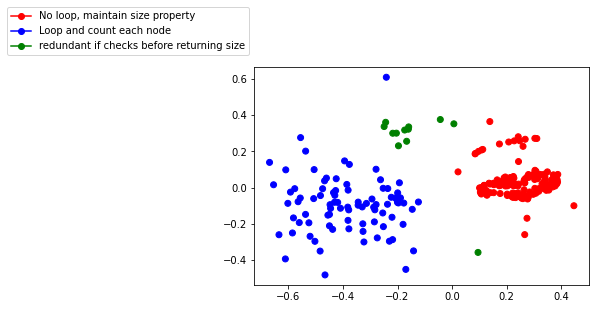

In [152]:
fig, ax = plt.subplots()
manual_rare_label=[s['label'] for s in methods]
cmap={'1':'red','2':'blue', '3':'green','4':'yellow'}
ax.scatter(mds_vectors_2dim[:,0],mds_vectors_2dim[:,1], c=[cmap[i] for i in manual_rare_label])
custom_legend=(Line2D([0],[0], marker ='o',color='red'),Line2D([0],[0], marker ='o',color='blue'), Line2D([0],[0], marker ='o',color='green'))
ax.legend(custom_legend,["No loop, maintain size property","Loop and count each node","redundant if checks before returning size"],bbox_to_anchor =(0,1.3))

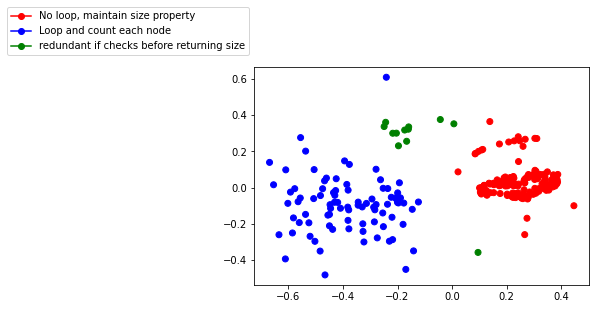

In [153]:
from matplotlib.lines import Line2D
fig, ax = plt.subplots()
size_label=[s['label'] for s in load_json(path+'size_NCD_3Groups.json')]
cmap1={'0':'red','1':'blue', '2':'green','3':'yellow'}
ax.scatter(mds_vectors_2dim[:,0],mds_vectors_2dim[:,1], c=[cmap1[i] for i in size_label])
custom_legend=(Line2D([0],[0], marker ='o',color='red'),Line2D([0],[0], marker ='o',color='blue'), Line2D([0],[0], marker ='o',color='green'))
ax.legend(custom_legend,["No loop, maintain size property","Loop and count each node","redundant if checks before returning size"],bbox_to_anchor =(0,1.3))
# for i in range(mds_vectors_2dim.shape[0]):
#     if(empty_label[i]=='1'):
#         ax.annotate(methods[i]['studentID'], (mds_vectors_2dim[i,0],mds_vectors_2dim[i,1]))

In [95]:
for i,m in enumerate(methods):
    m['label']=str(labels_med[i])
save_json(methods,path+'size_NCD_3Groups.json')

*********************************

iou:{('0', '1'): 1.0, ('1', '2'): 1.0, ('2', '3'): 1.0}


accuracy:{('0', '1'): 1.0, ('1', '2'): 1.0, ('2', '3'): 1.0}

rand score: 1.0
adjusted rand score: 1.0
normalized mutual information: 1.0
fowlkes mallows score: 1.0
confusion matrix:
    (0,0) - True Negatives. Pair is not clustered together in the predicted and manual clustering.
    (0,1) - False Positives. Pair is clustered together in prediction but not manual clustering.
    (1,0) - False Negatives. Pair is not clustered together in prediction but is clustered together in manual clustering.
    (1,1) - True Positives.  Pair is clustered together in the predicted and manual clustering.



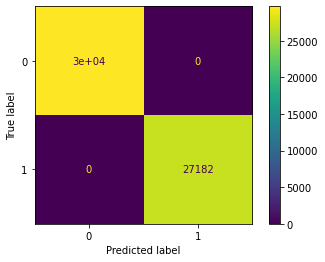

In [20]:
# dict_size ={s['studentID']:s for s in load_json(path+'size.json')}
# save_json(dict_size,path+'/sizeDict')
compare(path+'size_NCD_3GroupsDict.json',path+'/sizeDict.json','label').plot()

##### --------NCD----------

#### CLEAR

In [4]:
methods = load_json(path+'/clear')
print(f"Num methods = {len(methods)}")
for i,m in enumerate(methods):
    m['studentID']=f"Name{i}"

Num methods = 239


In [5]:
sub_arr= utils.methodArray_to_SubmissionArray(methods, [(f"Name{i}",i)for i in range(len(methods))],'tok')
clusterer = NCDClusterer(None, sub_arr)
res=clusterer.checkShuffleSimilarity(b=512, s=64,adaptive_windows=True) # Block vs regular-> regular tends to do better.
norm_res =(res - np.min(res))/(np.max(res)-np.min(res))

Pre-processing done!
calculating row: 0

calculating row: 1

calculating row: 2

calculating row: 3

calculating row: 4

calculating row: 5

calculating row: 6

calculating row: 7

calculating row: 8

calculating row: 9

calculating row: 10

calculating row: 11

calculating row: 12

calculating row: 13

calculating row: 14

calculating row: 15

calculating row: 16

calculating row: 17

calculating row: 18

calculating row: 19

calculating row: 20

calculating row: 21

calculating row: 22

calculating row: 23

calculating row: 24

calculating row: 25

calculating row: 26

calculating row: 27

calculating row: 28

calculating row: 29

calculating row: 30

calculating row: 31

calculating row: 32

calculating row: 33

calculating row: 34

calculating row: 35

calculating row: 36

calculating row: 37

calculating row: 38

calculating row: 39

calculating row: 40

calculating row: 41

calculating row: 42

calculating row: 43

calculating row: 44

calculating row: 45

calculating row: 46

ca

In [58]:
unionFind=UnionFind([m['studentID']for m in methods])
for i in range(len(methods)):
    for j in range(i+1,len(methods)):
        if(norm_res[i,j]<=0.225):
            unionFind.union(methods[i]['studentID'], methods[j]['studentID'])
             
unique_solns = {}
for solution in methods:
    key = unionFind.find(solution['studentID']) 
    if key not in unique_solns:
        unique_solns[key] = []
    unique_solns[key].append(solution)
unique_solns_summary=[(k,len(v)) for k,v in unique_solns.items()]
unique_solns_summary=sorted(unique_solns_summary,reverse=True,key=lambda x: x[1])

<BarContainer object of 26 artists>

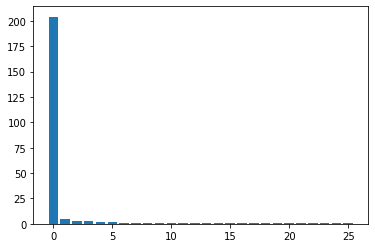

In [59]:
plt.bar(range(0,len(unique_solns_summary)),[x[1] for x in unique_solns_summary])

In [60]:
i=0
for k,v in unique_solns.items():
    print(f"******GROUP {i+1}*********")
    print(f"      ***SIZE: {len(unique_solns[k])}****")
    for solution in unique_solns[k]:
        print(solution['studentID'])
        print(solution['code'])
        print("")
    print("")

******GROUP 1*********
      ***SIZE: 1****
Name0
@Override
public void clear() {
    if (isEmpty()) {
        return;
    }
    size = 0;
    getRoot().next = null;
    getRoot().data = Double.NaN;
}


******GROUP 1*********
      ***SIZE: 204****
Name1
@Override
public void clear() {
    headCell = null;
    lastCell = null;
    size = 0;
}

Name2
@Override
public void clear() {
    // TODO Auto-generated method stub
    this.headCell = null;
    this.lastCell = null;
    this.size = 0;
}

Name3
public void clear() {
    headCell = null;
    lastCell = null;
}

Name4
@Override
public void clear() {
    headCell.next = null;
    headCell.prev = null;
    lastCell.next = null;
    lastCell.prev = null;
    headCell = null;
    lastCell = null;
}

Name5
@Override
public void clear() {
    headCell = null;
    lastCell = null;
    size = 0;
}

Name6
public void clear() {
    headCell = null;
    lastCell = null;
}

Name7
@Override
public void clear() {
    // TODO Auto-generated method s

In [6]:
clear_labels= {
    # no loop, don't set size =0
    '1':[3,   6,   8,  14,  20,  22,  26,  28,  29,  33,  36,  38,  40,
         42,  47,  51,  52,  54,  55,  57,  59,  62,  65,  73,  75,  82,
         87,  91,  98,  99, 102, 105, 109, 116, 119, 120, 129, 133, 135,
        144, 145, 153, 156, 157, 161, 171, 173, 181, 183, 186, 196, 198,
        203, 204, 206, 209, 211, 215, 216, 220, 227, 231, 233, 234, 237, 4, 21, 31, 43,136],
    # no loop, set size = 0  
    '2':[1,   2,    5,   7,   9,  11,  12,  13,  15,  16,  17,  19,
         25,  30,  32,  34,  39,  41,  46,  48,  49,  53,
         56,  58,  63,  64,  66,  67,  68,  69,  70,  71,  72,  74,  76,
         78,  79,  80,  84,  85,  86,  88,  89,  90,  92,  94,  95,  96,
        100, 101, 103, 107, 110, 111, 112, 114, 115, 118, 121, 122, 123,
        125, 126, 128, 130, 131, 132, 134, 138, 139, 140, 142, 146,
        147, 148, 149, 151, 152, 154, 155, 160, 162, 163, 164, 166, 167,
        170, 174, 175, 176, 177, 178, 179, 180, 182, 184, 185, 187, 189,
        191, 192, 193, 195, 197, 199, 200, 202, 205, 207, 208, 210, 212,
        213, 214, 218, 219, 223, 224, 225, 226, 228, 229, 230, 232, 235,
        236, 238, 0, 27, 108],
    # loop and manually set each node to null 
    '3':[18,  23, 35,  37,  44,  45,  50,  60,  77,
         97, 106, 113, 117, 137, 143,
        168, 172, 190, 201],
    # loop with call to remove() for each node
    '4':[10,  61,  83, 104, 127, 159, 169, 188, 194, 217, 222, 24, 81, 93, 124, 141, 150, 158, 165, 221],

}
# descr = list(filter(lambda x: x['name']=='clear',load_json('./comp410/410_descr_methods')))
# for i,m in enumerate(descr):
#     for k,v in clear_labels.items():
#         if(i in v):
#             m['label']=k
#             break
descr = load_json(path +'./clearDict.json')
save_json(list(descr.values()),path+'/clear.json')
# for i in ['1','2','3','4']:
#     print(len(clear_labels[i]))

In [25]:
mds_vectors_30dim = np.load(path+'NCDRes/30dim_vector_clear.npy')
mds_vectors_2dim=MDS(n_components=2,dissimilarity='precomputed').fit_transform(norm_res)
kmeans = KMeans(n_clusters=4,max_iter=10000)


In [35]:
kmeans.fit(mds_vectors_30dim)
labels_med = kmeans.labels_

In [134]:
np.save(path+'NCDRes/30dim_vector_clear.npy',mds_vectors_30dim)

In [125]:
clusters={i:[] for i in labels_med} #if i>0}
sims={i:[] for i in labels_med}
for i,m in enumerate(methods):
    # if(labels[i]<=0):
    #     continue
    clusters[labels_med[i]].append((m['code'],m['studentID']))
    sims[labels_med[i]].append(i)



for k,v in clusters.items():
    print(f"GROUP : {k} SIZE : {len(v)}")
    print()    
    for m in v:
        print(f'{m[1]}')
        print(m[0])
        print("\n ######")
    print("\n***********************************************")

GROUP : 0 SIZE : 28

Name0
@Override
public void clear() {
    if (isEmpty()) {
        return;
    }
    size = 0;
    getRoot().next = null;
    getRoot().data = Double.NaN;
}

 ######
Name18
@Override
public void clear() {
    if (!isEmpty()) {
        Node currentCell = headCell;
        Node nextCell = null;
        for (int i = 0; i < size(); i++) {
            nextCell = currentCell.next;
            currentCell.next = null;
            currentCell.prev = null;
        }
        headCell = null;
        lastCell = null;
        size = 0;
    }
//		headCell.next = lastCell;
//		lastCell.prev = headCell;
}

 ######
Name23
public void clear() {
    if (size == 0) {
        return;
    } else {
        Node currentNode = null;
        Node nextNode = headCell;
        for (int i = 0; i < size; i++) {
            currentNode = nextNode;
            nextNode = currentNode.next;
            currentNode.prev = null;
            currentNode.next = null;
        }
        headCell.next = 

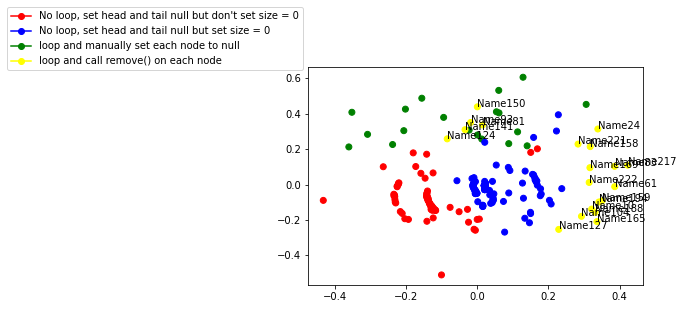

In [47]:
fig, ax = plt.subplots()
manual_rare_label=[s['label'] for s in methods]
cmap={'1':'red','2':'blue', '3':'green','4':'yellow'}
ax.scatter(mds_vectors_2dim[:,0],mds_vectors_2dim[:,1], c=[cmap[i] for i in manual_rare_label])
custom_legend=(Line2D([0],[0], marker ='o',color='red'),Line2D([0],[0], marker ='o',color='blue'), Line2D([0],[0], marker ='o',color='green'),Line2D([0],[0], marker ='o',color='yellow'))
ax.legend(custom_legend,["No loop, set head and tail null but don't set size = 0","No loop, set head and tail null but set size = 0",
"loop and manually set each node to null","loop and call remove() on each node"],bbox_to_anchor =(0,1.3))
for i in range(mds_vectors_2dim.shape[0]):
    if(manual_rare_label[i]=='4'):
        ax.annotate(methods[i]['studentID'], (mds_vectors_2dim[i,0],mds_vectors_2dim[i,1]))

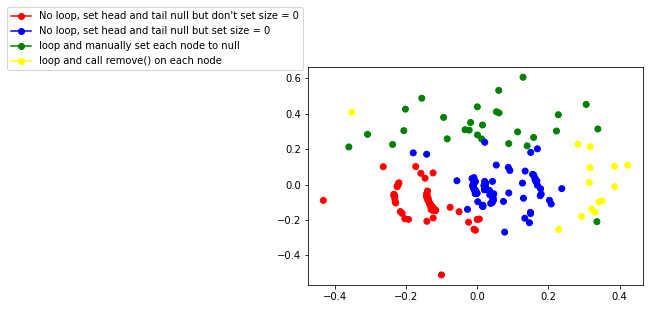

In [30]:
from matplotlib.lines import Line2D
fig, ax = plt.subplots()
clear_label=[s['label'] for s in load_json(path+'clear_NCD_4Groups2.json')]
cmap1={'2':'red','3':'blue', '0':'green','1':'yellow'}
ax.scatter(mds_vectors_2dim[:,0],mds_vectors_2dim[:,1], c=[cmap1[i] for i in clear_label])
custom_legend=(Line2D([0],[0], marker ='o',color='red'),Line2D([0],[0], marker ='o',color='blue'), Line2D([0],[0], marker ='o',color='green'),Line2D([0],[0], marker ='o',color='yellow'))
ax.legend(custom_legend,["No loop, set head and tail null but don't set size = 0","No loop, set head and tail null but set size = 0",
"loop and manually set each node to null","loop and call remove() on each node"],bbox_to_anchor =(0,1.3))
# for i in range(mds_vectors_2dim.shape[0]):
#     if(clear_label[i]=='1'):
#         ax.annotate(methods[i]['studentID'], (mds_vectors_2dim[i,0],mds_vectors_2dim[i,1]))

In [51]:
for i,m in enumerate(methods):
    m['label']=str(label_med_new[i])
save_json(methods,path+'clear_NCD_4Groups4.json')

*********************************

iou:{('3', '2'): 0.9923076923076923, ('2', '1'): 1.0, ('1', '4'): 0.75, ('0', '3'): 0.76}


accuracy:{('3', '2'): 0.9923076923076923, ('2', '1'): 1.0, ('1', '4'): 0.75, ('0', '3'): 1.0}

rand score: 0.9886431560071728
adjusted rand score: 0.9761517483545636
normalized mutual information: 0.9361772830029904
fowlkes mallows score: 0.9854818589070331
confusion matrix:
    (0,0) - True Negatives. Pair is not clustered together in the predicted and manual clustering.
    (0,1) - False Positives. Pair is clustered together in prediction but not manual clustering.
    (1,0) - False Negatives. Pair is not clustered together in prediction but is clustered together in manual clustering.
    (1,1) - True Positives.  Pair is clustered together in the predicted and manual clustering.



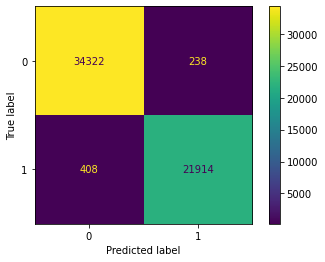

In [53]:
# dict_clear ={s['studentID']:s for s in load_json(path+'clear_NCD_4Groups4.json')}
# save_json(dict_clear,path+'/clear_NCD_4Groups4Dict.json')
compare(path+'/clear_NCD_4Groups3Dict.json',path+'/clearDict.json','label').plot()

0.0891757343486739


48

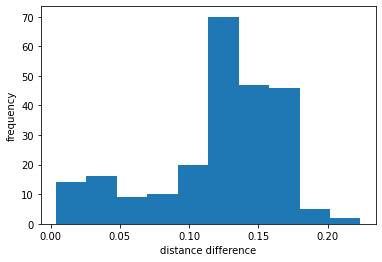

In [49]:
distances=cdist(mds_vectors_30dim,kmeans.cluster_centers_)
sorted_dist=[]
for row in distances:
    temp=np.sort(row)
    sorted_dist.append(temp[1]-temp[0])

plt.hist(sorted_dist)
plt.xlabel('distance difference')
plt.ylabel('frequency')
print(np.percentile(sorted_dist,20))
outliers=np.argwhere(sorted_dist<np.percentile(sorted_dist,20)).squeeze()
len(outliers)

In [50]:
import copy
rev_cmap1= {v:k for k,v in cmap1.items()}
label_med_new = copy.copy(clear_label)
for i in outliers:
    if(cmap1[str(label_med_new[i])]!=cmap[manual_rare_label[i]]):
        print(sorted_dist[i])
        print(cmap1[str(label_med_new[i])],cmap[manual_rare_label[i]])
        print(methods[i]['studentID'])
        print(methods[i]['code'])
        label_med_new[i]= rev_cmap1[cmap[manual_rare_label[i]]]

0.08008112310587029
green blue
Name0
@Override
public void clear() {
    if (isEmpty()) {
        return;
    }
    size = 0;
    getRoot().next = null;
    getRoot().data = Double.NaN;
}
0.03541756676635069
blue red
Name4
@Override
public void clear() {
    headCell.next = null;
    headCell.prev = null;
    lastCell.next = null;
    lastCell.prev = null;
    headCell = null;
    lastCell = null;
}
0.020018131552767326
blue red
Name21
@Override
public void clear() {
    if (size() == 0)
        return;
    headCell = null;
    lastCell = null;
}
0.04419826975218627
blue red
Name31
public void clear() {
    if (!isEmpty()) {
        headCell = null;
        lastCell = null;
        size();
    }
}
0.030405810473262074
blue red
Name43
public void clear() {
    if (!isEmpty()) {
        headCell.next = null;
        headCell.prev = null;
        lastCell.prev = null;
        lastCell.next = null;
    }
    headCell = null;
    lastCell = null;
}
0.03082912866108095
green blue
Name108
@Ov

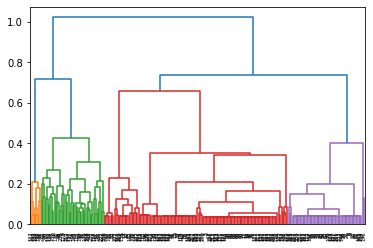

In [107]:
linkage=clusterer.cluster(sigmoid=False)
_=utils.plot_dendrogram(linkage,0,None)

In [108]:
labels=hc.fcluster(linkage,t=5,criterion='maxclust')


In [109]:
import nltk
clusters={i:[] for i in labels}
for i,m in enumerate(methods):
    clusters[labels[i]].append((m['code'],m['description']))

for k,v in clusters.items():
    print(f"GROUP : {k} SIZE : {len(v)}")
    print()    
    for m in v:
        print('-'+'\n-'.join(nltk.sent_tokenize(m[1])))
        print(m[0])
        print("\n ######")
    print("\n***********************************************")

GROUP : 2 SIZE : 45

-it is checking if the list is empty.
-If it is, then it returns.
-Otherwise, it sets the size to 0 and sets the root's next to null and sets the root's data to NaN.
@Override
public void clear() {
    if (isEmpty()) {
        return;
    }
    size = 0;
    getRoot().next = null;
    getRoot().data = Double.NaN;
}

 ######
-it is clearing the list by setting the head and last cells to null.
-It is also setting the next and prev pointers of each cell to null.
@Override
public void clear() {
    headCell.next = null;
    headCell.prev = null;
    lastCell.next = null;
    lastCell.prev = null;
    headCell = null;
    lastCell = null;
}

 ######
-it is removing the currentCell from the list.
-It is doing this by setting the next and prev pointers of the currentCell to null.
-It is also setting the headCell and lastCell to null.
@Override
public void clear() {
    if (!isEmpty()) {
        Node currentCell = headCell;
        Node nextCell = null;
        for (int i 

##### --------OPENAI----------

In [88]:
methods = load_json(path+'/clear')
#getDesc(methods,'A1/clear')
print(f"Num methods = {len(methods)}")

Num methods = 239


In [110]:
vectors=vectorize(path=path + '/clear')

1/239
101/239
201/239


In [117]:
def generateSimMat(vectors):
    sim_mat=np.zeros((vectors.shape[0],vectors.shape[0]),dtype=np.float64)
    def cosineSim(x,y):
        return max (1- np.dot(x,y)/(np.linalg.norm(x) * np.linalg.norm(y)),0)
    for i in range(vectors.shape[0]):
        for j in range (i+1,vectors.shape[0]):
            sim=cosineSim(vectors[i,:],vectors[j,:])
            sim_mat[i,j]=sim
            sim_mat[j,i]=sim
    return sim_mat
sim_mat=generateSimMat(vectors)

In [118]:
sim_mat=sim_mat*0.3 + clusterer.similarityMatix *0.7

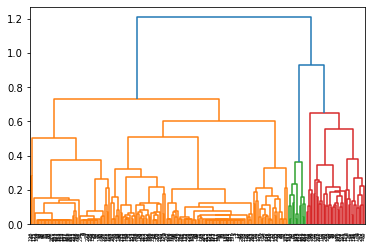

In [119]:
clusterer = Clusterer(sim_mat)
linkage=clusterer.cluster(sigmoid=False)
_=utils.plot_dendrogram(linkage,0,None)

In [120]:
labels=hc.fcluster(linkage,t=3,criterion='maxclust')

In [121]:
import nltk
clusters={i:[] for i in labels}
for i,m in enumerate(methods):
    clusters[labels[i]].append((m['code'],m['description']))

for k,v in clusters.items():
    print(f"GROUP : {k} SIZE : {len(v)}")
    print()    
    for m in v:
        print('-'+'\n-'.join(nltk.sent_tokenize(m[1])))
        print(m[0])
        print("\n ######")
    print("\n***********************************************")

GROUP : 3 SIZE : 42

-it is checking if the list is empty.
-If it is, then it returns.
-Otherwise, it sets the size to 0 and sets the root's next to null and sets the root's data to NaN.
@Override
public void clear() {
    if (isEmpty()) {
        return;
    }
    size = 0;
    getRoot().next = null;
    getRoot().data = Double.NaN;
}

 ######
-it is clearing the list by setting the head and last cells to null.
-It is also setting the next and prev pointers of each cell to null.
@Override
public void clear() {
    headCell.next = null;
    headCell.prev = null;
    lastCell.next = null;
    lastCell.prev = null;
    headCell = null;
    lastCell = null;
}

 ######
-it is removing the currentCell from the list.
-It is doing this by setting the next and prev pointers of the currentCell to null.
-It is also setting the headCell and lastCell to null.
@Override
public void clear() {
    if (!isEmpty()) {
        Node currentCell = headCell;
        Node nextCell = null;
        for (int i 

##### --------Token Counts----------

In [9]:
methods = load_json(path+'/get')
print(f"Num methods = {len(methods)}")

Num methods = 239


In [42]:
## compute vectors 
filter_tokens=set(['IF', 'WHILE', 'DO', 'FOR','RETURN', 'ASSIGN', 'IDENTIFIER', 
'DOT', 'GT', 'LT','GE','LE','NOTEQUAL', 'ELSE','INT', 'DOUBLE', 'NullLiteral', 'StringLiteral', 'IntegerLiteral',
'CharacterLiteral', 'BooleanLiteral', 'FloatingPointLiteral', 'EQUAL', 'QUESTION', 'COLON', 'CASE', 'CONTINUE',
 'DEFAULT', 'BREAK','BOOLEAN','LONG','CHAR','FLOAT','THIS', 'INC', 'DEC', 'ADD', 'SUB', 'DIV','MUL', 'MOD',
 'ADD_ASSIGN', 'SUB_ASSIGN','MUL_ASSIGN', 'DIV_ASSIGN','MOD_ASSIGN'])
vecs=np.concatenate(list(map(lambda x: utils.getTokenVector(x['code']),methods)),axis=0)

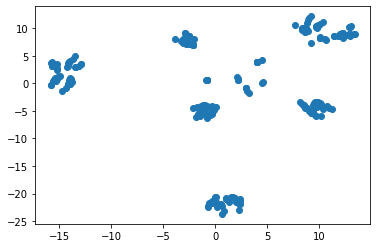

In [17]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
# pca = PCA(n_components=2)
# vecs_reduced=pca.fit_transform(vecs)
vecs_reduced = TSNE(n_components=2, learning_rate='auto',init='random').fit_transform(vecs)
plt.scatter(vecs_reduced[:,0], vecs_reduced[:,1])

In [38]:
def generateSimMat(vectors):
    sim_mat=np.zeros((vectors.shape[0],vectors.shape[0]),dtype=np.float64)
    def cosineSim(x,y):
        return max (1- np.dot(x,y)/(np.linalg.norm(x) * np.linalg.norm(y)),0)
    for i in range(vectors.shape[0]):
        for j in range (i+1,vectors.shape[0]):
            sim=cosineSim(vectors[i,:],vectors[j,:])
            sim_mat[i,j]=sim
            sim_mat[j,i]=sim
    return sim_mat
sim_mat=generateSimMat(vecs_reduced)

NameError: name 'vecs_reduced' is not defined

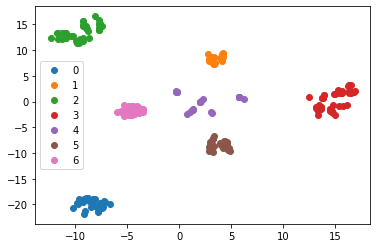

GROUP : 2 SIZE : 49

GROUP : 3 SIZE : 51

GROUP : 0 SIZE : 36

GROUP : 5 SIZE : 29

GROUP : 4 SIZE : 23

GROUP : 6 SIZE : 29

GROUP : 1 SIZE : 22



In [22]:
#sub_arr1= utils.methodArray_to_SubmissionArray(methods, [(f"Name{i}",i)for i in range(len(methods))],'tok')
clusterer = Clusterer(sim_mat)
#clusterer1= NCDClusterer(None,sub_arr1)
#clusterer.similarityMatix=0.15*sim_mat+ 0.45*clusterer.checkBlockSimilarity(k=20, b=32,s=16)+0.4*clusterer1.checkBlockSimilarity(k=20, b=32,s=16)
#labels=clusterer.cluster(nclusts=7,sigmoid=False)
labels=clusterer.kmeans(vecs_reduced,k=7)
clusters={i:[] for i in labels}
for i,m in enumerate(methods):
    clusters[labels[i]].append(m['code'])
for k,v in clusters.items():
    print(f"GROUP : {k} SIZE : {len(v)}")
    print() 

In [23]:

   
for k,v in clusters.items():
    print(f"GROUP : {k} SIZE : {len(v)}")
    print()    
    for m in v:
        print(m)
        print("\n ######")
    print("\n***********************************************")

GROUP : 2 SIZE : 49

@Override
public boolean insert(double elt, int index) {
    if (index > size() || elt == Double.NaN) {
        return false;
    }
    Node n = new Node(elt);
    Node curr = getRoot();
    if (index == 0) {
        if (size == 0) {
            lastCell = n;
        } else {
            n.next = curr;
            curr.prev = n;
        }
        headCell = n;
    } else if (index == size) {
        lastCell.next = n;
        n.prev = lastCell;
        lastCell = n;
    } else {
        for (int i = 0; i < index; i++) {
            curr = curr.getNext();
        }
        n.prev = curr.getPrev();
        n.next = curr;
        curr.getPrev().next = n;
        curr.prev = n;
    }
    size++;
    return true;
}

 ######
@Override
public boolean insert(double elt, int index) {
    if (index < 0) {
        return false;
    }
    if (index > size) {
        return false;
    }
    if (index == size) {
        Node toInsert = new Node(elt);
        if (size == 0) {
   

##### OPENAI + TOKEN COUNTS

In [43]:
vecs_combined=np.concatenate([vectors,vecs_reduced], axis=1)
sim_mat=generateSimMat(vecs_combined/np.linalg.norm(vecs_combined))

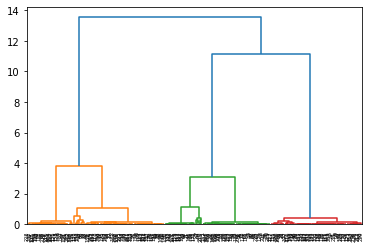

In [44]:
clusterer = Clusterer(sim_mat)
#labels=clusterer.kmeans(vecs_combined,k=7)
linkage=clusterer.cluster(sigmoid=False)
_=utils.plot_dendrogram(linkage,0,None)

In [45]:
import nltk
labels=hc.fcluster(linkage,t=3,criterion='maxclust')

clusters={i:[] for i in labels}
for i,m in enumerate(methods):
    clusters[labels[i]].append((m['code'],m['description']))

for k,v in clusters.items():
    print(f"GROUP : {k} SIZE : {len(v)}")
    print()    
    for m in v:
        print('-'+'\n-'.join(nltk.sent_tokenize(m[1])))
        print(m[0])
        print("\n ######")
    print("\n***********************************************")

GROUP : 2 SIZE : 76

-it is traversing through the linked list to find the value at a specific index.
-It is doing this by starting at the root and then traversing through the linked list until it reaches the index that we are looking for.
@Override
public double get(int index) {
    if (index > size() - 1) {
        return Double.NaN;
    }
    Node curr = getRoot();
    for (int i = 0; i < index; i++) {
        curr = curr.getNext();
    }
    return curr.getData();
}

 ######
-it is checking if the index is less than 0, if it is, then it returns NaN.
-If the index is greater than the size of the array minus 1, then it returns NaN.
-If the index is equal to 0, then it returns the headCell data.
-If the index is equal to size - 1, then it returns lastCell data.
@Override
public double get(int index) {
    if (index < 0) {
        return Double.NaN;
    }
    if (index > size - 1) {
        return Double.NaN;
    }
    if (index == 0) {
        return headCell.data;
    }
    if (index

# ASSIGNMENT 2- BST

In [27]:
methods_410_A2= load_json('./comp410/A2/BST')
method_names_A2=['insert', 'remove', 'contains', 'findMin', 'findMax','size','empty','height', 'getRoot']

In [5]:
for name in method_names_A2:
    save_json(list(filter(lambda x : x['name']==name, methods_410_A2)),f'./comp410/A2/{name}')

In [8]:
%cd .

c:\Users\vikram14\Desktop\Research\IntelliDiff


In [3]:
import os

students = os.listdir('./comp410A1/')
m410=[]
for student in students:
    lst =load_json(f'./comp410A1/{student}/dataset-0.json')
    for m in lst:
        m['studentName']=student[10:]
    
    m410 = m410+lst

In [55]:
a=list(filter(lambda x: x['name']=='size',m410))
b= load_json(path+'./size')
nameSet=set()
for x in b:
    x['studentName']=''
for y in a:
    if(y['studentName'] in nameSet):
        print(1)
        continue
    nameSet.add(y['studentName'])
    for x in b:
        if(y['code']==x['code'] and x['studentName']==''):
            x['studentName']=y['studentName']
            break
save_json(b,path+'./size')

1
1


In [59]:
names= [s['studentName'] for s in b]

TypeError: list.count() takes exactly one argument (0 given)